In [1]:
# ==============================================================================
# C-0: ENVIRONMENT SETUP AND PROJECT PATHS
# ==============================================================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
sns.set(style="whitegrid")

# Directories
data_dir = "../data"
figures_dir = "../figures"
models_dir = "../models"

os.makedirs(figures_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)

print("Paths set:")
print("Data:", data_dir)
print("Figures:", figures_dir)
print("Models:", models_dir)

Paths set:
Data: ../data
Figures: ../figures
Models: ../models



Dataset loaded successfully: 284807 rows, 31 columns
Found 1081 duplicate rows. Dropping them...
Data shape after removing duplicates: (283726, 31)

No missing values found.

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     283726 non-null  float64
 1   V1       283726 non-null  float64
 2   V2       283726 non-null  float64
 3   V3       283726 non-null  float64
 4   V4       283726 non-null  float64
 5   V5       283726 non-null  float64
 6   V6       283726 non-null  float64
 7   V7       283726 non-null  float64
 8   V8       283726 non-null  float64
 9   V9       283726 non-null  float64
 10  V10      283726 non-null  float64
 11  V11      283726 non-null  float64
 12  V12      283726 non-null  float64
 13  V13      283726 non-null  float64
 14  V14      283726 non-null  float64
 15  V15      283726 non-null  flo

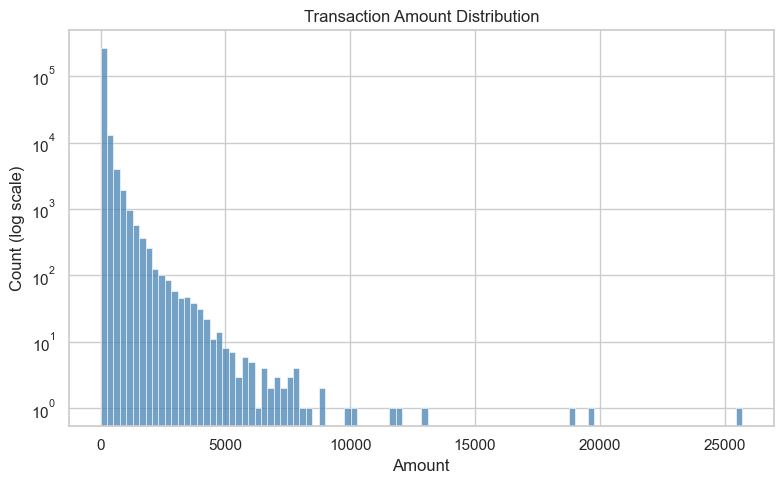

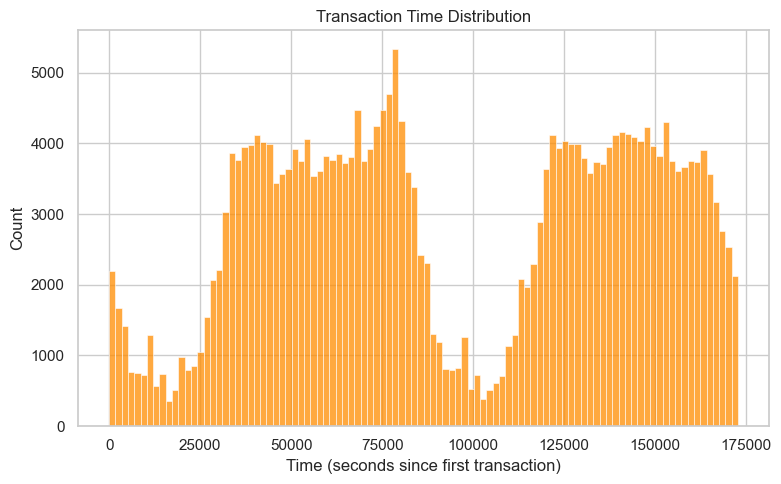

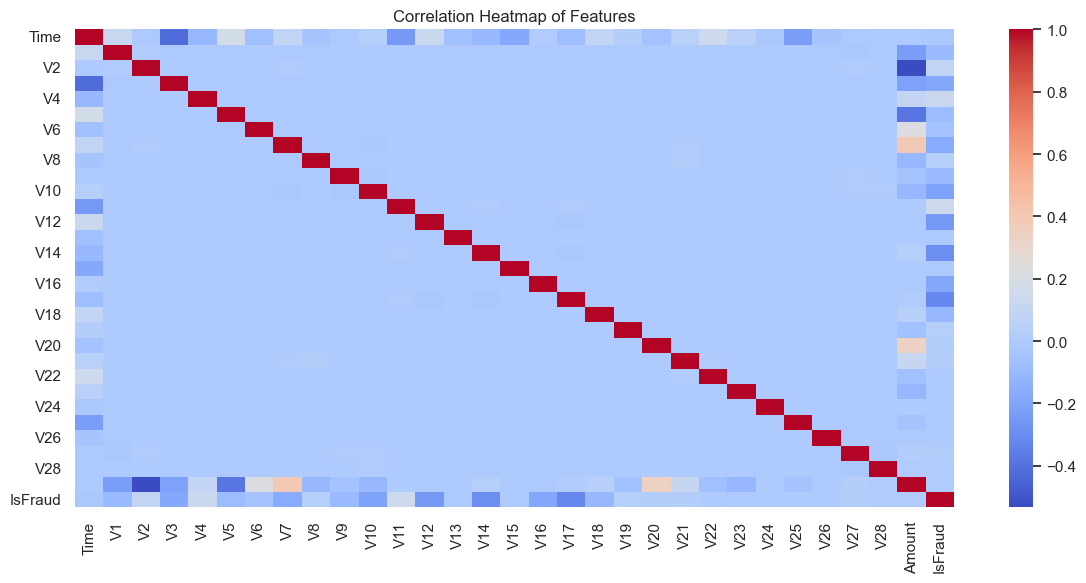


Cleaned dataset saved to: ../data\creditcard_clean.csv


In [2]:
# ==============================================================================
# C-1: EXPLORATORY DATA ANALYSIS (EDA) AND PREPROCESSING
# ==============================================================================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load dataset with error handling ---
data_path = os.path.join(data_dir, "creditcard.csv")
try:
    df = pd.read_csv(data_path)
    print(
        f"\nDataset loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print("Error: Dataset not found. Please check the path.")
    import sys
    sys.exit()

# --- Drop duplicates ---
duplicates = df.duplicated().sum()
if duplicates:
    print(f"Found {duplicates} duplicate rows. Dropping them...")
    df.drop_duplicates(inplace=True)
print("Data shape after removing duplicates:", df.shape)

# --- Check for missing values ---
missing = df.isnull().sum()
if missing.any():
    print(f"\nMissing values found. Dropping NA...")
    df.dropna(inplace=True)
else:
    print("\nNo missing values found.")

# --- Rename target column for clarity ---
df.rename(columns={'Class': 'IsFraud'}, inplace=True)

# --- Dataset info ---
print("\n--- Dataset Info ---")
df.info()

# --- Class distribution ---
fraud_counts = df['IsFraud'].value_counts()
fraud_percentage = (fraud_counts.get(1, 0) / len(df)) * 100
print("\n--- Class Distribution ---")
print(fraud_counts)
print(f"Fraudulent transactions percentage: {fraud_percentage:.4f}%")

# --- Summary statistics ---
print("\n--- Summary Statistics ---")
print(df.describe())

# --- Preview data ---
print("\n--- Sample Rows ---")
print(df.head())

# --- Ensure top-level reports/figures directory exists ---
reports_figures_dir = os.path.join("..", "reports", "figures")
os.makedirs(reports_figures_dir, exist_ok=True)

# --- Plot: Transaction Amount Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df["Amount"], bins=100, color="steelblue")
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Count (log scale)")
plt.yscale("log")
plt.tight_layout()
plt.savefig(os.path.join(reports_figures_dir, "amount_distribution.png"))
plt.show()

# --- Plot: Transaction Time Distribution (histogram) ---
plt.figure(figsize=(8, 5))
sns.histplot(df["Time"], bins=100, color="darkorange")
plt.title("Transaction Time Distribution")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(reports_figures_dir, "time_distribution.png"))
plt.show()

# --- Correlation heatmap ---
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.savefig(os.path.join(reports_figures_dir, "correlation_heatmap.png"))
plt.show()

# --- Save clean copy ---
clean_data_path = os.path.join(data_dir, "creditcard_clean.csv")
df.to_csv(clean_data_path, index=False)
print(f"\nCleaned dataset saved to: {clean_data_path}")

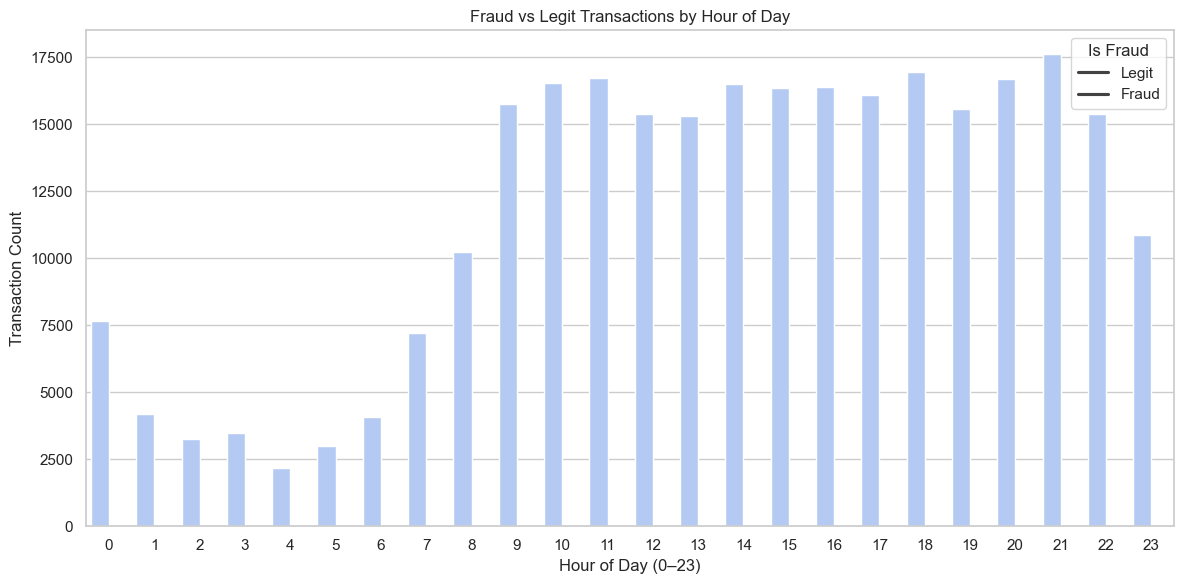

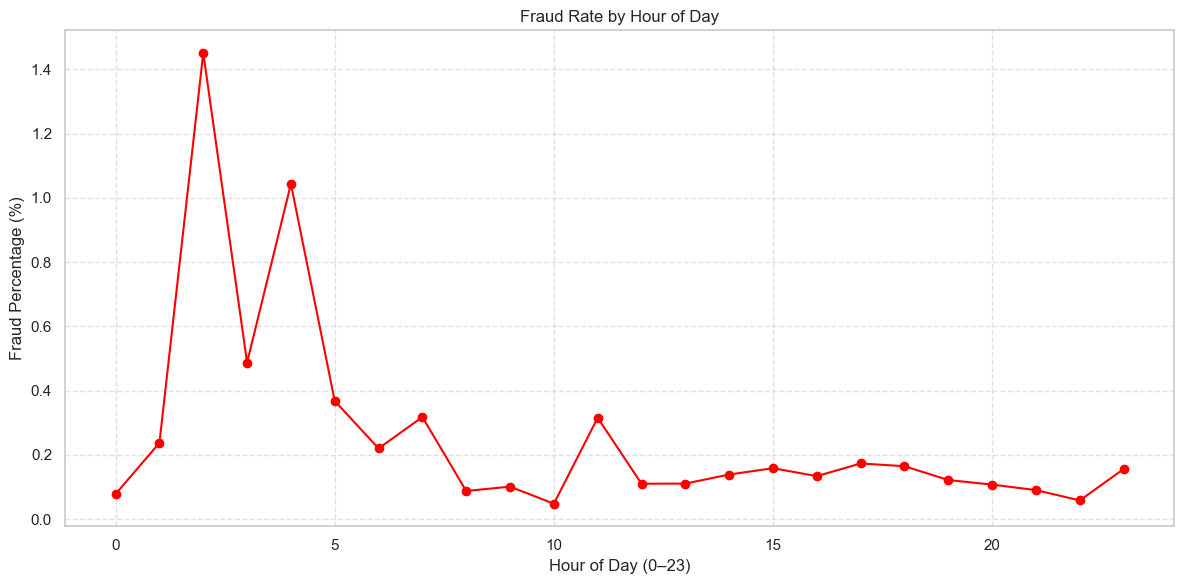

In [3]:
# ==============================================================================
# C-1b: TIME SERIES ANALYSIS
# Goal: Explore fraud patterns over time and save charts to reports/figures
# ==============================================================================

# Step 1: Import required packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 2: Ensure reports/figures directory exists
reports_figures_dir = os.path.join("..", "reports", "figures")
os.makedirs(reports_figures_dir, exist_ok=True)

# Step 3: Convert Time (seconds) to Hour of Day (0–23)
df['HourOfDay'] = ((df['Time'] // 3600) % 24).astype(int)

# ==============================================================================
# 1. Fraud vs Legit Counts by Hour of Day
# ==============================================================================
hour_counts = df.groupby(['HourOfDay', 'IsFraud']
                         ).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=hour_counts,
    x='HourOfDay',
    y='Count',
    hue='IsFraud',
    palette='coolwarm'
)
plt.title('Fraud vs Legit Transactions by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud', labels=['Legit', 'Fraud'])
plt.tight_layout()
plt.savefig(os.path.join(reports_figures_dir, "fraud_by_hour_counts.png"))
plt.show()

# ==============================================================================
# 2. Fraud Rate (%) by Hour of Day
# ==============================================================================
fraud_rate = df.groupby('HourOfDay')['IsFraud'].mean() * 100

plt.figure(figsize=(12, 6))
fraud_rate.plot(kind='line', marker='o', color='red')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Fraud Percentage (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(os.path.join(reports_figures_dir, "fraud_rate_by_hour.png"))
plt.show()


--- Baseline Classification Report ---
              precision    recall  f1-score   support

           0     0.9998    0.9750    0.9872     56651
           1     0.0553    0.8737    0.1041        95

    accuracy                         0.9748     56746
   macro avg     0.5276    0.9243    0.5457     56746
weighted avg     0.9982    0.9748    0.9858     56746


--- Baseline Metrics ---
Recall:    0.8737
Precision: 0.0553
PR AUC:    0.6734
ROC AUC:   0.9685


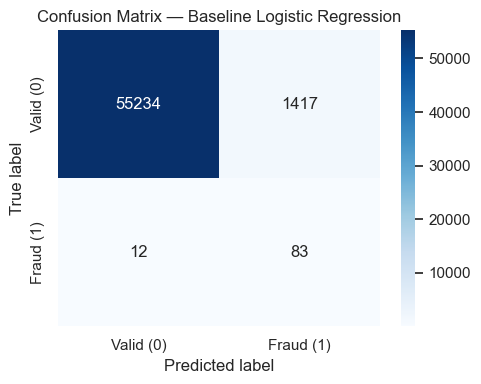


Cross-validated PR AUC (5-fold): 0.7371 ± 0.1195


In [4]:
# ==============================================================================
# C-2: BASELINE MODEL (LOGISTIC REGRESSION)
# Goal: Build and evaluate a simple baseline logistic regression model
# ==============================================================================

# Step 1: Import required packages
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, recall_score, precision_score,
    average_precision_score, roc_auc_score, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 2: Select numeric features only (exclude non-numeric like DateTime)
feature_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols.remove("IsFraud")  # remove target
X = df[feature_cols].copy()
y = df["IsFraud"].copy()

# Step 3: Train/test split (stratified to preserve class ratios)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# Step 4: ColumnTransformer for scaling numeric features
# Only scale "Time" and "Amount"; leave others as-is
scaler = ColumnTransformer([
    ("time_amount_scaler", StandardScaler(), ["Time", "Amount"])
], remainder="passthrough")

# Step 5: Create baseline pipeline
baseline_model = Pipeline(steps=[
    ("scaler", scaler),
    ("logreg", LogisticRegression(
        max_iter=200,
        class_weight="balanced",  # handle class imbalance
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])

# Step 6: Fit baseline model
baseline_model.fit(X_train, y_train)

# Step 7: Predictions and evaluation
y_pred_baseline = baseline_model.predict(X_test)
y_proba_baseline = baseline_model.predict_proba(X_test)[:, 1]

# Calculate key metrics
baseline_recall = recall_score(y_test, y_pred_baseline)
baseline_precision = precision_score(y_test, y_pred_baseline, zero_division=0)
baseline_pr_auc = average_precision_score(y_test, y_proba_baseline)
baseline_roc_auc = roc_auc_score(y_test, y_proba_baseline)

print("\n--- Baseline Classification Report ---")
print(classification_report(y_test, y_pred_baseline, digits=4))

print("\n--- Baseline Metrics ---")
print(f"Recall:    {baseline_recall:.4f}")
print(f"Precision: {baseline_precision:.4f}")
print(f"PR AUC:    {baseline_pr_auc:.4f}")
print(f"ROC AUC:   {baseline_roc_auc:.4f}")

# Step 8: Confusion matrix
cm = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Valid (0)", "Fraud (1)"],
            yticklabels=["Valid (0)", "Fraud (1)"])
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix — Baseline Logistic Regression")
plt.tight_layout()
plt.show()

# Step 9: Optional — Cross-validation for robustness
cv_scores = cross_val_score(
    baseline_model, X, y,
    cv=5, scoring="average_precision", n_jobs=-1
)
print(
    f"\nCross-validated PR AUC (5-fold): {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

In [5]:
# ==============================================================================
# C-3: HANDLE CLASS IMBALANCE WITH SMOTE
# Goal: Apply SMOTE to balance classes and compare Logistic Regression performance
# ==============================================================================

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, average_precision_score, roc_auc_score

# Step 1: Create SMOTE + Logistic Regression pipeline
smote_baseline_model = ImbPipeline(steps=[
    ("scaler", StandardScaler(with_mean=False)),  # scale numeric features
    ("smote", SMOTE(random_state=RANDOM_STATE, k_neighbors=5)),  # oversample minority
    ("logreg", LogisticRegression(
        max_iter=200,
        class_weight=None,   # SMOTE balances classes
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])

# Step 2: Fit SMOTE pipeline
smote_baseline_model.fit(X_train, y_train)

# Step 3: Predictions & probabilities
y_pred_smote_base = smote_baseline_model.predict(X_test)
y_proba_smote_base = smote_baseline_model.predict_proba(X_test)[:, 1]

# Step 4: Evaluate performance
smote_base_recall = recall_score(y_test, y_pred_smote_base)
smote_base_precision = precision_score(
    y_test, y_pred_smote_base, zero_division=0)
smote_base_pr_auc = average_precision_score(y_test, y_proba_smote_base)
smote_base_roc_auc = roc_auc_score(y_test, y_proba_smote_base)

print("\n--- SMOTE + Logistic Regression Metrics ---")
print(f"Recall:    {smote_base_recall:.4f}")
print(f"Precision: {smote_base_precision:.4f}")
print(f"PR AUC:    {smote_base_pr_auc:.4f}")
print(f"ROC AUC:   {smote_base_roc_auc:.4f}")

# Step 5: Compare with baseline
print("\n--- SMOTE Impact on Logistic Regression ---")
print(f"Recall Improvement: {smote_base_recall - baseline_recall:+.4f}")
print(f"Precision Change:   {smote_base_precision - baseline_precision:+.4f}")
print(f"PR AUC Change:      {smote_base_pr_auc - baseline_pr_auc:+.4f}")
print(f"ROC AUC Change:     {smote_base_roc_auc - baseline_roc_auc:+.4f}")


--- SMOTE + Logistic Regression Metrics ---
Recall:    0.8737
Precision: 0.0512
PR AUC:    0.6786
ROC AUC:   0.9662

--- SMOTE Impact on Logistic Regression ---
Recall Improvement: +0.0000
Precision Change:   -0.0041
PR AUC Change:      +0.0051
ROC AUC Change:     -0.0023


In [6]:
# ==============================================================================
# C-4: TRAIN ADVANCED MODELS (RANDOM FOREST AND ANN)
# ==============================================================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, precision_score, average_precision_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import joblib
import os

# --- Prepare SMOTE-balanced training set for Random Forest ---
smote = SMOTE(random_state=RANDOM_STATE)
X_train_bal, y_train_bal = smote.fit_resample(
    StandardScaler(with_mean=False).fit_transform(X_train), y_train)

# --- Random Forest Model ---
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=RANDOM_STATE
)
rf_model.fit(X_train_bal, y_train_bal)

# --- Evaluate Random Forest ---
X_test_scaled = StandardScaler(with_mean=False).fit_transform(X_test)
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print("\nRandom Forest Metrics:")
print(f"Recall:    {recall_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, zero_division=0):.4f}")
print(f"PR AUC:    {average_precision_score(y_test, y_proba_rf):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_proba_rf):.4f}")

# --- Deep Learning (ANN) ---
scaler_dl = StandardScaler(with_mean=False)
X_train_scaled = scaler_dl.fit_transform(X_train)
X_test_scaled = scaler_dl.transform(X_test)

# Apply SMOTE on scaled data
X_train_bal_dl, y_train_bal_dl = smote.fit_resample(X_train_scaled, y_train)
input_dim = X_train_bal_dl.shape[1]

# --- ANN Architecture (simpler to reduce overfitting) ---
dl_model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation="relu"),   # smaller hidden layer
    layers.Dropout(0.4),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(1, activation="sigmoid")
])

dl_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=[keras.metrics.Precision(
        name="precision"), keras.metrics.Recall(name="recall")]
)

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",          # monitor val_loss for better generalization
    mode="min",
    patience=5,
    restore_best_weights=True
)

history = dl_model.fit(
    X_train_bal_dl, y_train_bal_dl,
    validation_split=0.2,
    epochs=50,
    batch_size=512,              # smaller batch size for better generalization
    callbacks=[early_stop],
    verbose=1
)

# --- Evaluate ANN ---
dl_loss, dl_precision, dl_recall = dl_model.evaluate(
    X_test_scaled, y_test, verbose=0)
print("\nDeep Learning Model Metrics:")
print(f"Precision: {dl_precision:.4f}")
print(f"Recall:    {dl_recall:.4f}")
print(
    f"PR AUC:    {average_precision_score(y_test, dl_model.predict(X_test_scaled)):.4f}")
print(
    f"ROC AUC:   {roc_auc_score(y_test, dl_model.predict(X_test_scaled)):.4f}")

# --- Save Models ---
os.makedirs("../models", exist_ok=True)
joblib.dump(rf_model, "../models/random_forest_model.joblib")
dl_model.save("../models/deep_learning_model.keras")  # native Keras format
joblib.dump(scaler_dl, "../models/ann_scaler.joblib")

print("\n✅ Advanced models trained, evaluated, and saved.")


Random Forest Metrics:
Recall:    0.7263
Precision: 0.8846
PR AUC:    0.7952
ROC AUC:   0.9682
Epoch 1/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.1375 - precision: 0.9423 - recall: 0.9119 - val_loss: 0.0726 - val_precision: 1.0000 - val_recall: 0.9741
Epoch 2/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0454 - precision: 0.9793 - recall: 0.9788 - val_loss: 0.0216 - val_precision: 1.0000 - val_recall: 0.9984
Epoch 3/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0243 - precision: 0.9874 - recall: 0.9951 - val_loss: 0.0093 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 602s 11ms/step - loss: 0.0160 - precision: 0.9911 - recall: 0.9982 - val_loss: 0.0048 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0118 - precision: 0.9933 - recall: 0.9992 - val_loss: 0.0040 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 6/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - l


--- Starting Task C-5: Model Evaluation & Comparison ---
✅ Using existing X_test and y_test from training split.

Baseline (LogReg) Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9750    0.9872     56651
           1     0.0553    0.8737    0.1041        95

    accuracy                         0.9748     56746
   macro avg     0.5276    0.9243    0.5457     56746
weighted avg     0.9982    0.9748    0.9858     56746


Random Forest Classification Report:
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9079    0.7263    0.8070        95

    accuracy                         0.9994     56746
   macro avg     0.9537    0.8631    0.9034     56746
weighted avg     0.9994    0.9994    0.9994     56746


Neural Net Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9997     56651
        

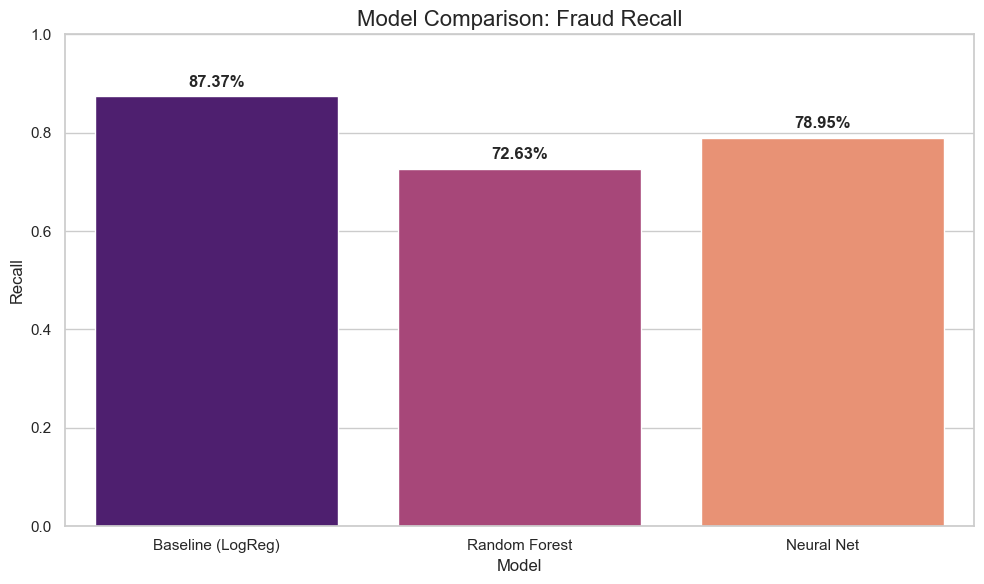

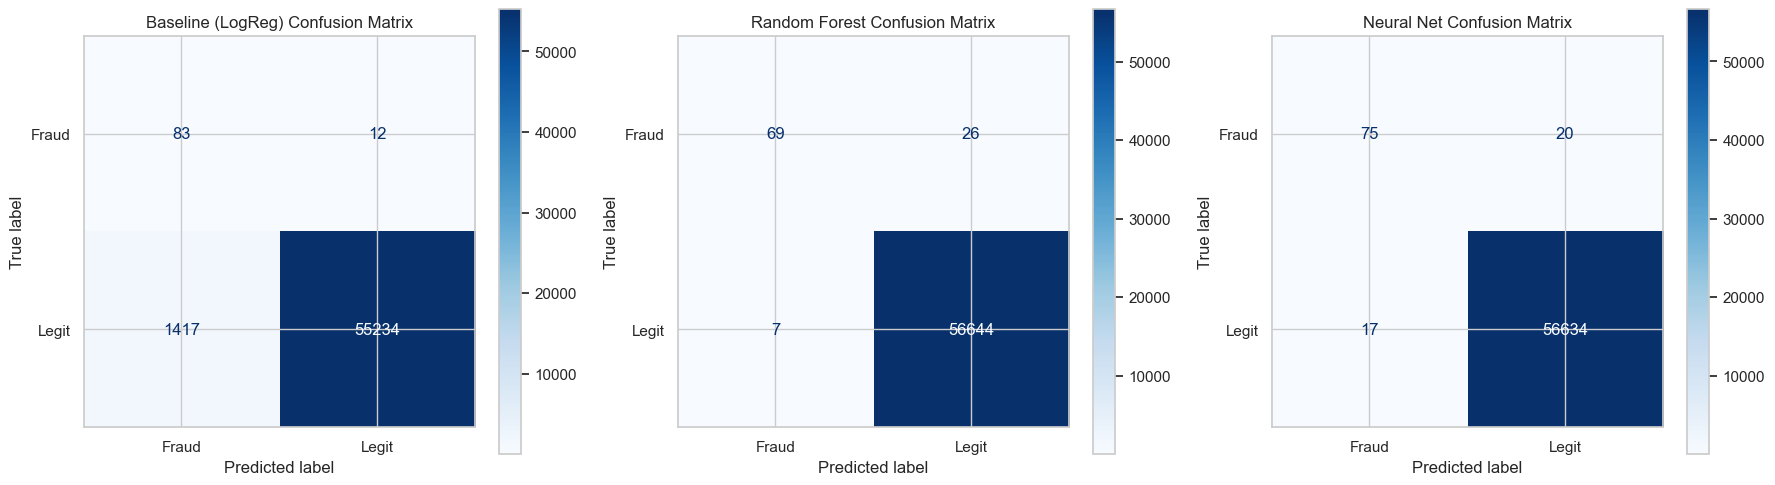

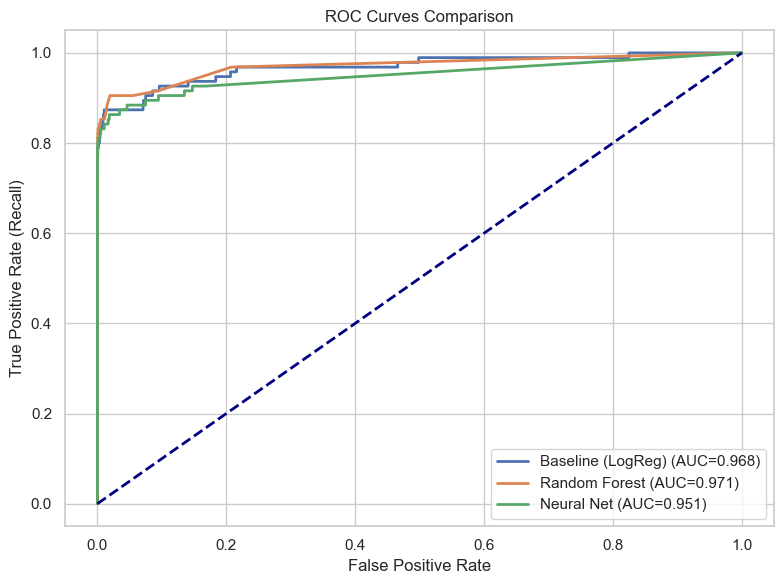

<Figure size 800x600 with 0 Axes>

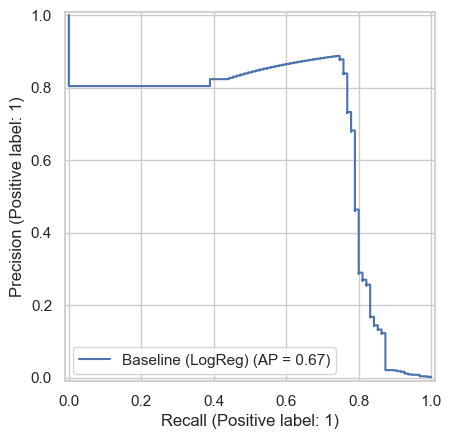

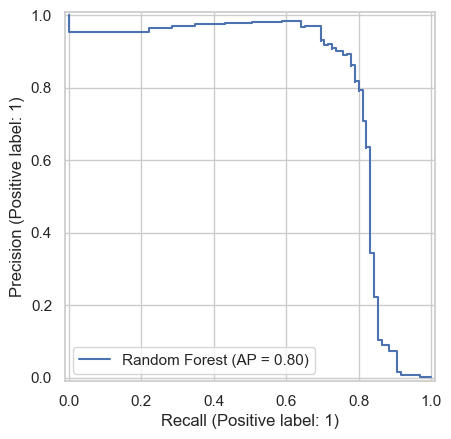

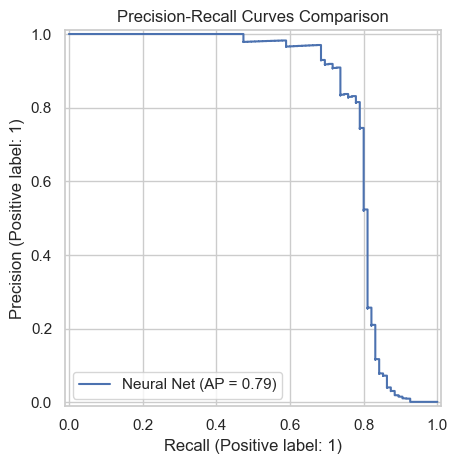


✅ Task C-5 Complete: All metrics calculated and visualizations saved.


In [7]:
# ==============================================================================
# C-5: GENERATE FINAL PERFORMANCE METRICS AND COMPARISON (CORRECTED)
# ==============================================================================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, recall_score, precision_score, f1_score,
    average_precision_score, roc_auc_score, roc_curve,
    confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay
)

print("\n--- Starting Task C-5: Model Evaluation & Comparison ---")

# --- Ensure reports/figures directory exists ---
reports_figures_dir = os.path.join("..", "reports", "figures")
os.makedirs(reports_figures_dir, exist_ok=True)

# --- Load test set (already available from previous cells) ---
print("✅ Using existing X_test and y_test from training split.")

# --- Scale test set consistently ---
X_test_scaled_all = scaler_dl.transform(X_test)

# --- Predictions (using correct model names) ---
# Random Forest
y_pred_rf = rf_model.predict(X_test_scaled_all)
y_prob_rf = rf_model.predict_proba(X_test_scaled_all)[:, 1]

# Neural Network
y_prob_dl = dl_model.predict(X_test_scaled_all, verbose=0).ravel()
y_pred_dl = (y_prob_dl > 0.5).astype(int)

# --- Metrics dictionary ---
models = {
    "Baseline (LogReg)": (y_pred_baseline, y_proba_baseline),
    "Random Forest": (y_pred_rf, y_prob_rf),
    "Neural Net": (y_pred_dl, y_prob_dl)
}

metrics_df = pd.DataFrame(
    columns=["Model", "Recall", "Precision", "F1", "PR AUC", "ROC AUC"])

for name, (y_pred, y_prob) in models.items():
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    pr_auc = average_precision_score(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    metrics_df.loc[len(metrics_df)] = [name, recall,
                                       precision, f1, pr_auc, roc_auc]

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

print("\n--- PERFORMANCE COMPARISON ---")
print(metrics_df.set_index("Model"))

# --- Recall Barplot ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=metrics_df,
    x="Model",
    y="Recall",
    hue="Model",
    palette="magma",
    legend=False
)
plt.title("Model Comparison: Fraud Recall", fontsize=16)
plt.ylabel("Recall")
plt.ylim(0, 1.0)
for i, val in enumerate(metrics_df["Recall"]):
    plt.text(i, val + 0.02, f"{val:.2%}",
             ha="center", fontsize=12, fontweight="bold")
plt.tight_layout()
plt.savefig(os.path.join(reports_figures_dir, "model_comparison_recall.png"))
plt.show()

# --- Combined Confusion Matrices ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, (y_pred, _)) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=["Fraud", "Legit"])
    disp.plot(cmap="Blues", values_format="d", ax=ax)
    ax.set_title(f"{name} Confusion Matrix")
plt.tight_layout()
plt.savefig(os.path.join(reports_figures_dir, "cm_all_models.png"))
plt.show()

# --- ROC Curves ---
plt.figure(figsize=(8, 6))
for name, (_, y_prob) in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curves Comparison")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(reports_figures_dir, "roc_curves_all.png"))
plt.show()

# --- Precision-Recall Curves ---
plt.figure(figsize=(8, 6))
for name, (_, y_prob) in models.items():
    PrecisionRecallDisplay.from_predictions(y_test, y_prob, name=name)
plt.title("Precision-Recall Curves Comparison")
plt.tight_layout()
plt.savefig(os.path.join(reports_figures_dir,
            "precision_recall_curves_all.png"))
plt.show()

print("\n✅ Task C-5 Complete: All metrics calculated and visualizations saved.")

In [8]:
# ==============================================================================
# C-6: SAVE THE FINAL TRAINED MODELS (CORRECTED)
# ==============================================================================

import os
import joblib
import json
from datetime import datetime, timezone

# --- Ensure models directory exists ---
models_dir = os.path.join("..", "models")
os.makedirs(models_dir, exist_ok=True)

# --- Timezone-aware UTC timestamp ---
timestamp = datetime.now(timezone.utc).isoformat()

# --- Save baseline Logistic Regression pipeline ---
joblib.dump(baseline_model, os.path.join(models_dir, "baseline_logreg.joblib"))

# --- Save Random Forest model ---
joblib.dump(rf_model, os.path.join(models_dir, "fraud_detection_rf.joblib"))

# --- Save ANN model and its scaler ---
dl_model.save(os.path.join(models_dir, "ann_fraud_detection.keras"))
joblib.dump(scaler_dl, os.path.join(models_dir, "ann_scaler.joblib"))

# --- Save metadata for reproducibility ---
metadata = {
    "timestamp": timestamp,
    "random_state": RANDOM_STATE,
    "features": feature_cols,
    "models": {
        "baseline_logreg": "baseline_logreg.joblib",
        "rf_model": "fraud_detection_rf.joblib",
        "ann_model": "ann_fraud_detection.keras",
        "ann_scaler": "ann_scaler.joblib"
    }
}

with open(os.path.join(models_dir, "metadata.json"), "w") as f:
    json.dump(metadata, f, indent=2)

print("✅ All models and metadata saved to:", models_dir)

✅ All models and metadata saved to: ..\models


In [3]:
# ==============================
# 💳 AI Fraud Detection Chatbot
# ==============================

import joblib
import pickle
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import warnings

# Suppress warnings for a cleaner chatbot experience
warnings.filterwarnings('ignore', category=UserWarning)

# ------------------------------
# 1. Load models and preprocessors
# ------------------------------
# NOTE: This script assumes the model files are in the same directory.
# If they are in a subdirectory (e.g., 'models'), update the paths.

try:
    baseline_model = joblib.load("../models/baseline_logreg.joblib")
    print("✅ Baseline model loaded (baseline_logreg.joblib)")
except Exception as e:
    baseline_model = None
    print(f"⚠️ Could not load baseline model: {e}")

try:
    rf_model = joblib.load("../models/fraud_detection_rf.joblib")
    print("✅ Random Forest model loaded (fraud_detection_rf.joblib)")
except Exception as e:
    rf_model = None
    print(f"⚠️ Could not load Random Forest model: {e}")

try:
    # Using the more specific model name from uploaded files
    deep_model = load_model("../models/ann_fraud_detection.keras")
    print("✅ Deep Learning model loaded (ann_fraud_detection.keras)")
except Exception as e:
    deep_model = None
    print(f"⚠️ Could not load Deep Learning model: {e}")

# Load preprocessor/scaler
try:
    preprocessor = joblib.load("../models/ann_scaler.joblib")
    print("✅ Scaler/Preprocessor loaded (ann_scaler.joblib)")
except Exception as e:
    preprocessor = None
    print(f"⚠️ Could not load preprocessor or scaler: {e}")


# ------------------------------
# 2. Prediction function
# ------------------------------
def predict_fraud(user_data, model_choice="baseline"):
    """
    Predicts whether a transaction is fraudulent or legitimate.
    
    Args:
        user_data (dict): Dictionary containing transaction features from the user.
        model_choice (str): The model to use ('baseline', 'rf', or 'deep').
        
    Returns:
        str: The prediction result.
    """
    if preprocessor is None:
        return "❌ Preprocessor not loaded. Cannot make predictions."

    # FIX: To prevent feature mismatch errors, we must create a DataFrame that
    # exactly matches the structure the models were trained on.
    try:
        # Get the exact feature names and order from the trained scaler
        feature_names = preprocessor.feature_names_in_
    except AttributeError:
        # Fallback if the scaler is old and doesn't have this attribute
        print("⚠️ Scaler is missing feature names. Using a default list.")
        feature_names = [
            'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 
            'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 
            'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'HourOfDay'
        ]

    # Create a dictionary for a single row with default values (0.0)
    full_data = {feature: 0.0 for feature in feature_names}

    # Populate the dictionary with the capitalized feature names the model expects
    full_data['Amount'] = user_data.get('amount', 0.0)
    user_hour = user_data.get('time', 0.0)
    full_data['HourOfDay'] = user_hour
    full_data['Time'] = user_hour * 3600 # Convert hour to seconds for the 'Time' feature

    # Create a DataFrame with the exact column order the model was trained on
    df = pd.DataFrame([full_data], columns=feature_names)

    # Preprocess input using the loaded scaler
    try:
        # The deep learning model requires externally scaled data.
        X_scaled = preprocessor.transform(df)
    except Exception as e:
        print(f"⚠️ Preprocessing error: {e}")
        return "❌ Preprocessing failed — check input features"

    # Choose model and predict
    try:
        if model_choice == "baseline" and baseline_model is not None:
            # The baseline and RF models are pipelines; they handle their own scaling.
            # We pass the unscaled DataFrame `df` to them.
            y_pred = baseline_model.predict(df)
        elif model_choice == "rf" and rf_model is not None:
            y_pred = rf_model.predict(df)
        elif model_choice == "deep" and deep_model is not None:
            # The Keras model expects the pre-scaled data `X_scaled`.
            y_pred_proba = deep_model.predict(X_scaled)
            y_pred = np.argmax(y_pred_proba, axis=1)
        else:
            return "❌ Selected model not available"
    except Exception as e:
        return f"❌ Prediction error: {e}"

    return "🚨 Fraudulent Transaction Detected!" if int(y_pred[0]) == 1 else "✅ Legitimate Transaction"

# ------------------------------
# 3. Jupyter chatbot function
# ------------------------------
def jupyter_chatbot():
    """
    Initiates and runs the command-line chatbot session.
    """
    print("\n" + "="*60)
    print("💬 Welcome to the AI Fraud Detection Chatbot!")
    print("="*60)
    print("This tool uses machine learning to predict transaction fraud.")
    print("Type 'exit' anytime to stop.\n")

    while True:
        try:
            # FIX: Add input validation to prevent crashes on empty or invalid input
            amount_str = input("💰 Enter transaction amount (e.g., 99.95): ")
            if amount_str.lower() == "exit":
                print("\n👋 Chatbot session ended.")
                break
            if not amount_str:
                print("⚠️ Amount cannot be empty. Please try again.")
                print("-" * 60)
                continue
            amount = float(amount_str)

            time_str = input("🕒 Enter time of transaction (0–24 format, e.g., 14.5 for 2:30 PM): ")
            if time_str.lower() == "exit":
                print("\n👋 Chatbot session ended.")
                break
            if not time_str:
                print("⚠️ Time cannot be empty. Please try again.")
                print("-" * 60)
                continue
            time = float(time_str)
            
            if not (0 <= time <= 24):
                print("⚠️ Invalid time. Please enter a value between 0 and 24.")
                print("-" * 60)
                continue

            user_data = {
                "amount": amount,
                "time": time
            }

            model_choice = input("🤖 Choose model [baseline / rf / deep]: ").lower().strip()
            if model_choice == "exit":
                 print("\n👋 Chatbot session ended.")
                 break
            
            if model_choice not in ["baseline", "rf", "deep"]:
                print("⚠️ Invalid choice — defaulting to 'baseline'")
                model_choice = "baseline"

            print("\n🔍 Analyzing transaction...\n")
            result = predict_fraud(user_data, model_choice)
            print(f"▶️  Result from '{model_choice.upper()}' model: {result}")
            print("-" * 60)

        except ValueError:
            print("⚠️ Invalid input. Please enter a valid number for amount and time.")
            print("-" * 60)
            continue
        except Exception as e:
            print(f"⚠️ An unexpected error occurred: {e}")
            print("-" * 60)
            continue

# ------------------------------
# 4. Start chatbot
# ------------------------------
if __name__ == "__main__":
    jupyter_chatbot()

✅ Baseline model loaded (baseline_logreg.joblib)
✅ Random Forest model loaded (fraud_detection_rf.joblib)
✅ Deep Learning model loaded (ann_fraud_detection.keras)
✅ Scaler/Preprocessor loaded (ann_scaler.joblib)

💬 Welcome to the AI Fraud Detection Chatbot!
This tool uses machine learning to predict transaction fraud.
Type 'exit' anytime to stop.


🔍 Analyzing transaction...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
▶️  Result from 'DEEP' model: ✅ Legitimate Transaction
------------------------------------------------------------
⚠️ Amount cannot be empty. Please try again.
------------------------------------------------------------

👋 Chatbot session ended.
